# Benchmarcks and plots of various SVM RL envs

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [6]:
## All the data stored in the hdf5 file
f = h5py.File('run_.hdf5', 'r')

list(f.keys())

['actor_models',
 'critic_models',
 'energies',
 'hyperparams',
 'info',
 'princip_dims',
 'rewards',
 'sigmas']

In [7]:
## Read file and print its info and hyperparams
for k in f['info'].attrs.keys():
    print(k, ' : ', f['info'].attrs[k])

for k in f['hyperparams'].attrs.keys():
    print(k, ' : ', f['hyperparams'].attrs[k])

alg  :  DDPG
env  :  svmEnv-v0
add_noise_every  :  1
batch_size  :  64
bootstrap_size  :  5
gamma  :  1.0
lr_actor  :  0.0001
lr_critic  :  0.0001
num_update  :  1
tau  :  0.001
transfer_every  :  1
update_every  :  1


In [44]:
## Example of data stored and number of episodes
# print(list(f['rewards'].keys()))

print('The number of episodes is then:', len(f['rewards'].keys()))

The number of episodes is then: 400


The max score is at episode 148 and is equal to 58381.6484375
The min score is at episode 177 and is equal to -1224.746826171875


Text(0.5, 0, 'Episode #')

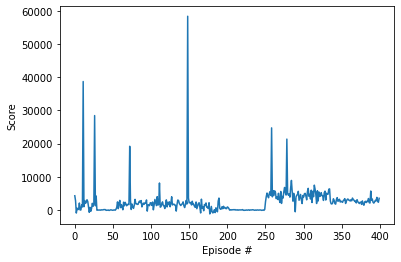

In [45]:
## Score data analysis

scores = np.zeros(len(f['rewards'].keys()))
for i in range(len(f['rewards'].keys())):
    scores[i] = np.sum(f['rewards'][f'rew_ep_{i}'][:])
    
## Max and min
index_max = np.argmax(scores)
index_min = np.argmin(scores)
print(f'The max score is at episode {index_max} and is equal to {scores[index_max]}')
print(f'The min score is at episode {index_min} and is equal to {scores[index_min]}')
    
## Plot scores    
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')

This episode collected a score of =  58381.65


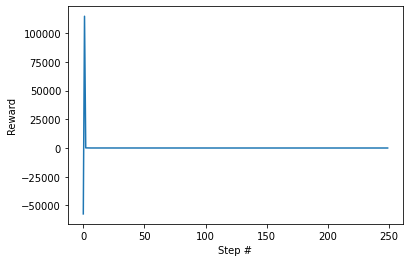

In [46]:
## Rewards of episode with max score

plt.plot(np.arange(len(f['rewards'][f'rew_ep_{index_max}'])), f['rewards'][f'rew_ep_{index_max}'][:])
plt.ylabel('Reward')
plt.xlabel('Step #')

print('This episode collected a score of = ', np.sum(f['rewards'][f'rew_ep_{index_max}'][:]))

The last energy reached is =  -0.051594


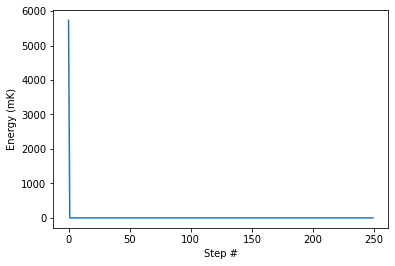

In [47]:
## Plot energies of episode with max score

plt.plot(np.arange(len(f['energies'][f'en_ep_{index_max}'])), f['energies'][f'en_ep_{index_max}'][:])
plt.ylabel('Energy (mK)')
plt.xlabel('Step #')

print('The last energy reached is = ',f['energies'][f'en_ep_{index_max}'][-1])

The last princip dim reached is =  78


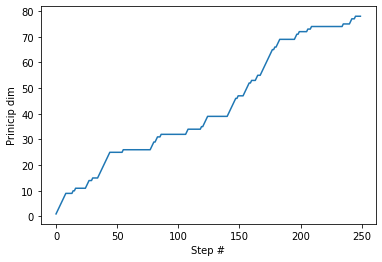

In [48]:
## Plot princip dim of episode with max score

plt.plot(np.arange(len(f['princip_dims'][f'pri_dim_ep_{index_max}'])), f['princip_dims'][f'pri_dim_ep_{index_max}'][:])
plt.ylabel('Prinicip dim')
plt.xlabel('Step #')

print('The last princip dim reached is = ', f['princip_dims'][f'pri_dim_ep_{index_max}'][-1])

(array([ 1.,  3.,  1.,  1.,  2., 11., 20., 17., 12., 31.]),
 array([ 9748.964, 11306.832, 12864.7  , 14422.568, 15980.437, 17538.305,
        19096.172, 20654.041, 22211.908, 23769.777, 25327.645],
       dtype=float32),
 <BarContainer object of 10 artists>)

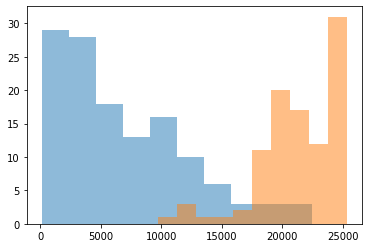

In [49]:
## Sigmas analysis (comparing with random and the one collected in the epsidoe with max score)

sigmas_random = np.loadtxt('sigmas_random.out')
sigmas_random_squared = sigmas_random[:,0]**2 + sigmas_random[:,1]**2 + sigmas_random[:,2]**2

sigmas_rl = f['sigmas'][f'sigmas_ep_{index_max}'][:]
sigmas_rl_squared = sigmas_rl[:,0]**2 + sigmas_rl[:,1]**2 + sigmas_rl[:,2]**2

plt.hist(sigmas_random_squared, bins=10, alpha=0.5)
plt.hist(sigmas_rl_squared, bins=10, alpha=0.5)

This episode collected a score of =  -1224.7468


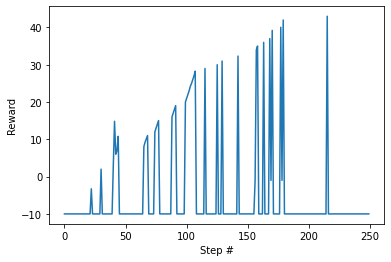

In [50]:
## Plot rewards of episode with min score

plt.plot(np.arange(len(f['rewards'][f'rew_ep_{index_min}'])), f['rewards'][f'rew_ep_{index_min}'][:])
plt.ylabel('Reward')
plt.xlabel('Step #')

print('This episode collected a score of = ', np.sum(f['rewards'][f'rew_ep_{index_min}'][:]))

The last energy reached is =  -0.147395


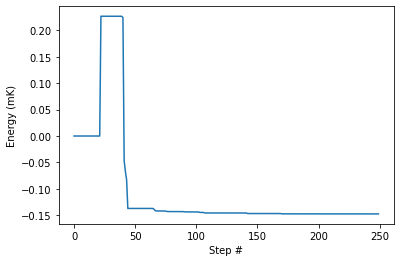

In [51]:
## Plot energies of episode with min score

plt.plot(np.arange(len(f['energies'][f'en_ep_{index_min}'])), f['energies'][f'en_ep_{index_min}'][:])
plt.ylabel('Energy (mK)')
plt.xlabel('Step #')

print('The last energy reached is = ',f['energies'][f'en_ep_{index_min}'][-1])

The last princip dim reached is =  43


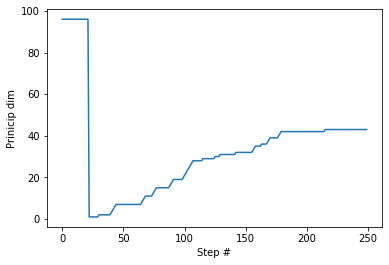

In [52]:
## Plot princip dim of episode with min score

plt.plot(np.arange(len(f['princip_dims'][f'pri_dim_ep_{index_min}'])), f['princip_dims'][f'pri_dim_ep_{index_min}'][:])
plt.ylabel('Prinicip dim')
plt.xlabel('Step #')

print('The last princip dim reached is = ', f['princip_dims'][f'pri_dim_ep_{index_min}'][-1])